In [30]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
import xarray as xr
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from matplotlib.transforms import ScaledTranslation
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LogNorm
from sklearn import preprocessing

In [6]:
file_dir = 'C:/Users/taiwoajayi/Documents/DPR/'
files_2020 = sorted(glob.glob( file_dir + '**GPM*2021**.h5'))

In [7]:
DPR = []
for i in range(0,len(files_2020)):
    DPR.append(h5py.File(files_2020[i], 'r'))

In [8]:
i=1

In [9]:
DPR

[<HDF5 file "2A.GPM.DPR.V9-20211125.20170825-S220715-E233946.019840.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170825-S233947-E011219.019841.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S085505-E102737.019847.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S102738-E120010.019848.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S120011-E133242.019849.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S133243-E150515.019850.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S181022-E194254.019853.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S194255-E211527.019854.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S211528-E224759.019855.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170826-S224800-E002032.019856.V07A.SUB.h5" (mode r)>,
 <HDF5 file "2A.GPM.DPR.V9-20211125.20170827-S080317-E093549.019862.V07A.SUB.h5"

In [51]:
day = np.array(DPR[i]["FS"]['SLV']['precipRateNearSurface'])
day

array([[-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9,     0. ],
       [-9999.9, -9999.9, -9999.9, ...,     0. ,     0. ,     0. ],
       [-9999.9, -9999.9, -9999.9, ...,     0. ,     0. ,     0. ],
       ...,
       [    0. ,     0. ,     0. , ..., -9999.9, -9999.9, -9999.9],
       [    0. ,     0. , -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [    0. , -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]],
      dtype=float32)

In [50]:
day7 = np.array(DPR[i]["FS"]['SLV']['precipRate'])
day7

array([[[-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        ...,
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ]],

       [[-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        ...,
        [    0. ,     0. ,     0. , ...,     0. ,     0. , -9999.9],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
        [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ]],

       [[-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
        [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
    

In [64]:
dee = np.array(DPR[i]["FS"]['SLV']['zFactorFinal'])
dee

array([[[[-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         ...,
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9]],

        [[-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         ...,
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9]],

        [[-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         ...,
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9]],

        ...,

        [[-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         ...,
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9]],

        [[-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         ...,
         [-9999.9, -9999.9],
         [-9999.9, -9999.9],
         [-9999.9, -9999.9]],

        [[-9999.9, -9999.9],
       

In [65]:
import numpy as np

# Assuming 'your_array' is the NumPy array you want to check
if dee.ndim == 4:
    print("It's a four-dimensional array.")
    print("Shape:", dee.shape)
else:
    print("It's not a four-dimensional array.")


It's a four-dimensional array.
Shape: (1097, 49, 17, 2)


In [67]:
import numpy as np

# Assuming 'your_array' is the NumPy array you want to check
if day7.ndim == 3:
    print("It's a three-dimensional array.")
    print("Shape:", day7.shape)
else:
    print("It's not a three-dimensional array.")


It's a three-dimensional array.
Shape: (1097, 49, 17)


In [72]:

n = 48  # Set the value of 'n'

# Assuming 'ref' is a 4D NumPy array (you need to replace this with your actual data)
# Create a 2D slice by selecting the 1st element along the 1st dimension and the nth element along the 2nd dimension
var = dee[0, n, :, :]

# Find indices where elements are NaN
f = np.where(np.isnan(var))

# Replace NaN elements with -1
var[f] = -1
len(var)


17

In [85]:
'''# Loop through the 22 datasets and add them to the combined DataFrame
data_dict_list = []

for i in range(22):
    data_dict = {
        'PrecipitationRate': np.array(DPR[i]["FS"]['SLV']['precipRate'])
    }
    data_dict_list.append(data_dict)

n = 48  # Set the value of 'n'

# Assuming 'ref' is a 3D NumPy array
# Create a 2D slice by selecting the 1st element along the 1st dimension and the nth element along the 2nd dimension
var = data_dict_list[0]['PrecipitationRate'][n, :].flatten()
#temp = var.flatten()'''


In [99]:
'''# Loop through the 22 datasets and add them to the combined DataFrame
data_dict_list = []

for i in range(22):
    data_dict = {
        'zFactor': np.array(DPR[i]["FS"]['SLV']['zFactorFinal'])
    }
    data_dict_list.append(data_dict)

n = 48  # Set the value of 'n'

# Assuming 'ref' is a 3D NumPy array
# Create a 2D slice by selecting the 1st element along the 1st dimension and the nth element along the 2nd dimension
var = data_dict_list[0]['zFactor'][0, n, :, :].flatten()
var
#temp = var.flatten()'''


'# Loop through the 22 datasets and add them to the combined DataFrame\ndata_dict_list = []\n\nfor i in range(22):\n    data_dict = {\n        \'zFactor\': np.array(DPR[i]["FS"][\'SLV\'][\'zFactorFinal\'])\n    }\n    data_dict_list.append(data_dict)\n\nn = 48  # Set the value of \'n\'\n\n# Assuming \'ref\' is a 3D NumPy array\n# Create a 2D slice by selecting the 1st element along the 1st dimension and the nth element along the 2nd dimension\nvar = data_dict_list[0][\'zFactor\'][0, n, :, :].flatten()\nvar\n#temp = var.flatten()'

In [97]:
''' # Create an empty DataFrame to store the combined data
combo = pd.DataFrame()   # Create a temporary DataFrame for the current dataset
temp_dff = pd.DataFrame(var)
    
    # Add the temporary DataFrame to the combined DataFrame
combo = pd.concat([combo, temp_dff], axis=0, ignore_index=True)


# Remove rows with -9999 values in any column
combo = combo[(combo != -9999.90).all(axis=1)]

# Reset the index after removing rows
combo.reset_index(drop=True, inplace=True)

combo'''

,0


In [54]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['ScanTime']['DayOfYear']).flatten())
    print(f"Dataset {i + 1} length: {length}")


Dataset 1 length: 1082
Dataset 2 length: 310
Dataset 3 length: 802
Dataset 4 length: 1097
Dataset 5 length: 1096
Dataset 6 length: 710
Dataset 7 length: 851
Dataset 8 length: 1096
Dataset 9 length: 1096
Dataset 10 length: 706
Dataset 11 length: 447
Dataset 12 length: 1096
Dataset 13 length: 1096
Dataset 14 length: 1093
Dataset 15 length: 159
Dataset 16 length: 447
Dataset 17 length: 1096
Dataset 18 length: 1096
Dataset 19 length: 983
Dataset 20 length: 980
Dataset 21 length: 1096
Dataset 22 length: 1097


In [14]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['navigation']['timeMidScan']).flatten())
    print(f"Dataset {i + 1} length: {length}")


Dataset 1 length: 1082
Dataset 2 length: 310
Dataset 3 length: 802
Dataset 4 length: 1097
Dataset 5 length: 1096
Dataset 6 length: 710
Dataset 7 length: 851
Dataset 8 length: 1096
Dataset 9 length: 1096
Dataset 10 length: 706
Dataset 11 length: 447
Dataset 12 length: 1096
Dataset 13 length: 1096
Dataset 14 length: 1093
Dataset 15 length: 159
Dataset 16 length: 447
Dataset 17 length: 1096
Dataset 18 length: 1096
Dataset 19 length: 983
Dataset 20 length: 980
Dataset 21 length: 1096
Dataset 22 length: 1097


In [58]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['Latitude']).flatten())
    print(f"Dataset {i + 1} length: {length}")


Dataset 1 length: 53018
Dataset 2 length: 15190
Dataset 3 length: 39298
Dataset 4 length: 53753
Dataset 5 length: 53704
Dataset 6 length: 34790
Dataset 7 length: 41699
Dataset 8 length: 53704
Dataset 9 length: 53704
Dataset 10 length: 34594
Dataset 11 length: 21903
Dataset 12 length: 53704
Dataset 13 length: 53704
Dataset 14 length: 53557
Dataset 15 length: 7791
Dataset 16 length: 21903
Dataset 17 length: 53704
Dataset 18 length: 53704
Dataset 19 length: 48167
Dataset 20 length: 48020
Dataset 21 length: 53704
Dataset 22 length: 53753


In [16]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['navigation']['dprAlt']).flatten())
    print(f"Dataset {i + 1} length: {length}")


Dataset 1 length: 1082
Dataset 2 length: 310
Dataset 3 length: 802
Dataset 4 length: 1097
Dataset 5 length: 1096
Dataset 6 length: 710
Dataset 7 length: 851
Dataset 8 length: 1096
Dataset 9 length: 1096
Dataset 10 length: 706
Dataset 11 length: 447
Dataset 12 length: 1096
Dataset 13 length: 1096
Dataset 14 length: 1093
Dataset 15 length: 159
Dataset 16 length: 447
Dataset 17 length: 1096
Dataset 18 length: 1096
Dataset 19 length: 983
Dataset 20 length: 980
Dataset 21 length: 1096
Dataset 22 length: 1097


In [17]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['PRE']['height']).flatten())
    print(f"Dataset {i + 1} length: {length}")


Dataset 1 length: 901306
Dataset 2 length: 258230
Dataset 3 length: 668066
Dataset 4 length: 913801
Dataset 5 length: 912968
Dataset 6 length: 591430
Dataset 7 length: 708883
Dataset 8 length: 912968
Dataset 9 length: 912968
Dataset 10 length: 588098
Dataset 11 length: 372351
Dataset 12 length: 912968
Dataset 13 length: 912968
Dataset 14 length: 910469
Dataset 15 length: 132447
Dataset 16 length: 372351


Dataset 17 length: 912968
Dataset 18 length: 912968
Dataset 19 length: 818839
Dataset 20 length: 816340
Dataset 21 length: 912968
Dataset 22 length: 913801


In [18]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['PRE']['elevation']).flatten())
    print(f"Dataset {i + 1} length: {length}")


Dataset 1 length: 53018
Dataset 2 length: 15190
Dataset 3 length: 39298
Dataset 4 length: 53753
Dataset 5 length: 53704
Dataset 6 length: 34790
Dataset 7 length: 41699
Dataset 8 length: 53704
Dataset 9 length: 53704
Dataset 10 length: 34594
Dataset 11 length: 21903
Dataset 12 length: 53704
Dataset 13 length: 53704
Dataset 14 length: 53557
Dataset 15 length: 7791
Dataset 16 length: 21903
Dataset 17 length: 53704
Dataset 18 length: 53704
Dataset 19 length: 48167
Dataset 20 length: 48020
Dataset 21 length: 53704
Dataset 22 length: 53753


In [47]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['SLV']['precipRate']).flatten())
    print(f"Dataset {i + 1} length: {length}")

Dataset 1 length: 901306
Dataset 2 length: 258230
Dataset 3 length: 668066
Dataset 4 length: 913801
Dataset 5 length: 912968
Dataset 6 length: 591430
Dataset 7 length: 708883
Dataset 8 length: 912968
Dataset 9 length: 912968
Dataset 10 length: 588098
Dataset 11 length: 372351
Dataset 12 length: 912968
Dataset 13 length: 912968
Dataset 14 length: 910469
Dataset 15 length: 132447
Dataset 16 length: 372351
Dataset 17 length: 912968
Dataset 18 length: 912968
Dataset 19 length: 818839
Dataset 20 length: 816340
Dataset 21 length: 912968
Dataset 22 length: 913801


In [20]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['PRE']['heightStormTop']).flatten())
    print(f"Dataset {i + 1} length: {length}")

Dataset 1 length: 53018
Dataset 2 length: 15190
Dataset 3 length: 39298
Dataset 4 length: 53753
Dataset 5 length: 53704
Dataset 6 length: 34790
Dataset 7 length: 41699
Dataset 8 length: 53704
Dataset 9 length: 53704
Dataset 10 length: 34594
Dataset 11 length: 21903
Dataset 12 length: 53704
Dataset 13 length: 53704
Dataset 14 length: 53557
Dataset 15 length: 7791
Dataset 16 length: 21903
Dataset 17 length: 53704
Dataset 18 length: 53704
Dataset 19 length: 48167
Dataset 20 length: 48020
Dataset 21 length: 53704
Dataset 22 length: 53753


In [21]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['SLV']['zFactorFinal']).flatten())
    print(f"Dataset {i + 1} length: {length}")

Dataset 1 length: 1802612
Dataset 2 length: 516460


Dataset 3 length: 1336132
Dataset 4 length: 1827602
Dataset 5 length: 1825936
Dataset 6 length: 1182860
Dataset 7 length: 1417766
Dataset 8 length: 1825936
Dataset 9 length: 1825936
Dataset 10 length: 1176196
Dataset 11 length: 744702
Dataset 12 length: 1825936
Dataset 13 length: 1825936
Dataset 14 length: 1820938
Dataset 15 length: 264894
Dataset 16 length: 744702
Dataset 17 length: 1825936
Dataset 18 length: 1825936
Dataset 19 length: 1637678
Dataset 20 length: 1632680
Dataset 21 length: 1825936
Dataset 22 length: 1827602


In [22]:
for i in range(22):
    length = len(np.array(DPR[i]["FS"]['SLV']['precipRateNearSurface']).flatten())
    print(f"Dataset {i + 1} length: {length}")

Dataset 1 length: 53018
Dataset 2 length: 15190
Dataset 3 length: 39298
Dataset 4 length: 53753
Dataset 5 length: 53704
Dataset 6 length: 34790
Dataset 7 length: 41699
Dataset 8 length: 53704
Dataset 9 length: 53704
Dataset 10 length: 34594
Dataset 11 length: 21903
Dataset 12 length: 53704
Dataset 13 length: 53704
Dataset 14 length: 53557
Dataset 15 length: 7791
Dataset 16 length: 21903
Dataset 17 length: 53704
Dataset 18 length: 53704
Dataset 19 length: 48167
Dataset 20 length: 48020
Dataset 21 length: 53704
Dataset 22 length: 53753


In [23]:

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(22):
    data_dict = {
        'Latitude': np.array(DPR[i]["FS"]['Latitude']).flatten(),
        'Longitude': np.array(DPR[i]["FS"]['Longitude']).flatten(),
        'Elevation': np.array(DPR[i]["FS"]['PRE']['elevation']).flatten(),
        'HeightStormTop': np.array(DPR[i]["FS"]['PRE']['heightStormTop']).flatten(), 
        'precipRateNearSurface': np.array(DPR[i]["FS"]['SLV']['precipRateNearSurface']).flatten()
    }

    # Replace -9999 with -99999 in the data
    for key in data_dict:
        data_dict[key][data_dict[key] == -9999.90] = -2.05
    
    # Create a temporary DataFrame for the current dataset
    temp_df = pd.DataFrame(data_dict)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_df = pd.concat([combined_df, temp_df], axis=0, ignore_index=True)


combined_df


,Latitude,Longitude,Elevation,HeightStormTop,precipRateNearSurface
0,-2.05,-2.05,-2.05,-2.05,-2.05
1,-2.05,-2.05,-2.05,-2.05,-2.05
2,-2.05,-2.05,-2.05,-2.05,-2.05
3,-2.05,-2.05,-2.05,-2.05,-2.05
4,-2.05,-2.05,-2.05,-2.05,-2.05
...,...,...,...,...,...
957063,-2.05,-2.05,-2.05,-2.05,-2.05
957064,-2.05,-2.05,-2.05,-2.05,-2.05
957065,-2.05,-2.05,-2.05,-2.05,-2.05
957066,-2.05,-2.05,-2.05,-2.05,-2.05


In [24]:

# Create an empty DataFrame to store the combined data
combined_df2 = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(22):
    data_dict = {
        'Latitude': np.array(DPR[i]["FS"]['Latitude']).flatten(),
        'Longitude': np.array(DPR[i]["FS"]['Longitude']).flatten(),
        'Elevation': np.array(DPR[i]["FS"]['PRE']['elevation']).flatten(),
        'HeightStormTop': np.array(DPR[i]["FS"]['PRE']['heightStormTop']).flatten(), 
        'precipRateNearSurface': np.array(DPR[i]["FS"]['SLV']['precipRateNearSurface']).flatten()
    }
    
    # Create a temporary DataFrame for the current dataset
    temp_df = pd.DataFrame(data_dict)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_df2 = pd.concat([combined_df2, temp_df], axis=0, ignore_index=True)


# Remove rows with -9999 values in any column
combined_df2= combined_df2[(combined_df2 != -9999.90).all(axis=1)]

# Reset the index after removing rows
combined_df2.reset_index(drop=True, inplace=True)

combined_df2


,Latitude,Longitude,Elevation,HeightStormTop,precipRateNearSurface
0,50.207638,-131.867584,-17.0,3978.025879,0.000000
1,50.238106,-131.812973,-17.0,4105.676270,0.267468
2,50.268444,-131.758408,-17.0,3362.821533,0.000000
3,50.173820,-131.823517,-18.0,3719.820312,0.209298
4,50.204262,-131.768936,-17.0,4221.003906,0.362256
...,...,...,...,...,...
83332,35.066570,-109.783249,1703.0,6825.772949,0.000000
83333,35.163082,-109.970245,1641.0,6966.019043,0.000000
83334,35.891090,-110.467224,1826.0,4078.705078,0.185222
83335,38.359814,-105.790352,2208.0,4758.074219,0.401576


In [27]:
combined_df2.min()

Latitude                   8.845730
Longitude               -132.142715
Elevation                -70.000000
HeightStormTop           777.581360
precipRateNearSurface      0.000000
dtype: float32

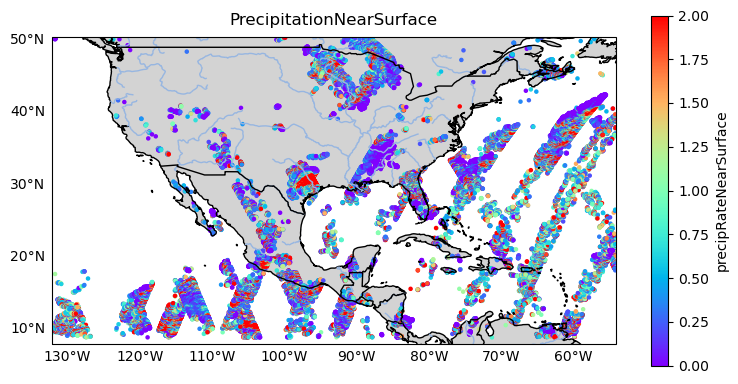

In [102]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-132.15, -54.15, 8, 50.35], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(combined_df2['Longitude'], combined_df2['Latitude'], c=combined_df2['precipRateNearSurface'], cmap='rainbow', s=5, transform=ccrs.PlateCarree(), vmax=2)
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('precipRateNearSurface')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('PrecipitationNearSurface')

# Show the map
plt.show()

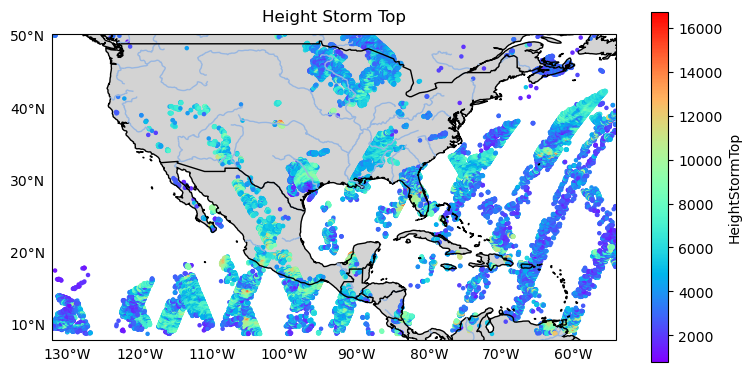

In [37]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-132.15, -54.15, 8, 50.35], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
#plt.scatter(x, y, c=colors, cmap='RdYlGn', s=100)
sc = ax.scatter(combined_df2['Longitude'], combined_df2['Latitude'], c=combined_df2['HeightStormTop'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('HeightStormTop')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Height Storm Top')

# Show the map
plt.show()

In [39]:

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(22):
    data_dict = {
        'HeightTop': np.array(DPR[i]["FS"]['PRE']['height']).flatten(),
        'PrecipitationRate': np.array(DPR[i]["FS"]['SLV']['precipRate']).flatten(),
    }
    
    # Create a temporary DataFrame for the current dataset
    temp_dff = pd.DataFrame(data_dict)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_df = pd.concat([combined_df, temp_dff], axis=0, ignore_index=True)


# Remove rows with -9999 values in any column
combined_df = combined_df[(combined_df != -9999.90).all(axis=1)]

# Reset the index after removing rows
combined_df.reset_index(drop=True, inplace=True)

combined_df



,HeightTop,PrecipitationRate
0,2032.074585,0.0
1,1908.010986,0.0
2,1783.947388,0.0
3,1659.883789,0.0
4,1535.820190,0.0
...,...,...
13154484,704.240295,0.0
13154485,585.333923,0.0
13154486,466.427490,0.0
13154487,347.521088,0.0


In [42]:


# Assuming you have a DataFrame called 'combined_df' with a 'HeightTop' column
# Replace 'combined_df' with your actual DataFrame name

# Filter the rows within the specified range
filtered_df = combined_df[(combined_df['HeightTop'] >= 0) & (combined_df['HeightTop'] <= 2000)]

# Display the filtered DataFrame
filtered_df


,HeightTop,PrecipitationRate
1,1908.010986,0.0
2,1783.947388,0.0
3,1659.883789,0.0
4,1535.820190,0.0
5,1411.756714,0.0
...,...,...
13154484,704.240295,0.0
13154485,585.333923,0.0
13154486,466.427490,0.0
13154487,347.521088,0.0


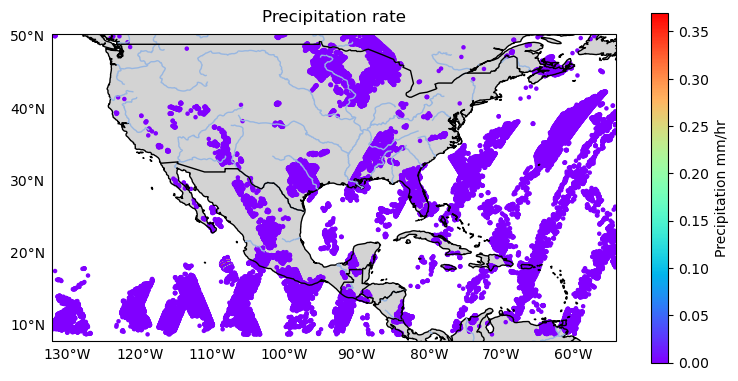

In [101]:
# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

# Customize the map projection and extent
ax.set_extent([-132.15, -54.15, 8, 50.35], crs=ccrs.PlateCarree())
ax.coastlines()

# Add additional map features, such as rivers, borders, or land color
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optionally, plot data or markers on the map
# Match the size of filtered_df to combined_df2
filtered_df_matched = filtered_df.iloc[:len(combined_df2)]
sc = ax.scatter(combined_df2['Longitude'], combined_df2['Latitude'], c=filtered_df_matched['PrecipitationRate'], cmap='rainbow', s=5, transform=ccrs.PlateCarree())
#ax.plot(traj_all2_subset['Longitude'], traj_all2_subset['Latitude'], c=traj_all2_subset['Launch_Altitude_AGL_m'], cmap='rainbow', transform=ccrs.PlateCarree())  # Example marker
cbar = plt.colorbar(sc)
cbar.set_label('Precipitation mm/hr')
# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Add a star marker for a single point
# Set the title of the map
ax.set_title('Precipitation rate')

# Show the map
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(22):
    data_dict = {
        'PrecipitationRate': np.array(DPR[i]["FS"]['SLV']['precipRate']),
        'Latitude': np.array(DPR[i]["FS"]['Latitude']),
        'Longitude': np.array(DPR[i]["FS"]['Longitude']),
        'HeightStormTop': np.array(DPR[i]["FS"]['PRE']['heightStormTop']),
        'HeightTop': np.array(DPR[i]["FS"]['PRE']['height']),
        'Elevation': np.array(DPR[i]["FS"]['PRE']['elevation']),
        'DayOfYear': np.array(DPR[i]["FS"]['ScanTime']['DayOfYear']),
        'DPRAlt': np.array(DPR[i]["FS"]['navigation']['dprAlt']),
        'TimeMidScan': np.array(DPR[i]["FS"]['navigation']['timeMidScan'])
    }
    
    # Create a temporary DataFrame for the current dataset
    temp_df = pd.DataFrame(data_dict)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_df = pd.concat([combined_df, temp_df], axis=0, ignore_index=True)

# Print the combined DataFrame
print(combined_df)
